## Linear Regression Assignment "Bike_Sharing_Assignment"

### Problem Statemet

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Covid-19 pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

**The company wants to know:**

1) Which variables are significant in predicting the demand for shared bikes.

2)How well those variables describe the bike demands

**Business Goal:**

1) A model to be developed  to find the variables which are significant the demand for shared bikes with the available independent variables.


## 1.Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2.Reading & Understanding Dataset

In [2]:
#Importing the data
df_bike_share = pd.read_csv('day.csv')

In [3]:
#Reading the top 5 rows
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#dataset shape
df_bike_share.shape 

(730, 16)

In [5]:
#checking info about columns
df_bike_share.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#checking for the nulls
df_bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#checking data distribution details of all columns
df_bike_share.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# checking all columns
df_bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
# checking the data types
df_bike_share.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

## 3.Data Cleaning


#### 3.1 Dropping the instatnt

In [10]:
# Droping instant column beacuse it is just a row instance identifier
df_bike_share.drop(['instant'], axis = 1, inplace = True)

#### 3.2 dteday column we will check date,month and year in 'dteday' all are in their respective range or not.

In [11]:
df_bike_share.dteday.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

In [12]:
df_bike_share.dteday.apply(lambda x:int(x.split('-')[0])).describe() #checking days

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [13]:
df_bike_share.dteday.apply(lambda x:int(x.split('-')[1])).describe() #checking months

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [14]:
df_bike_share.dteday.apply(lambda x:int(x.split('-')[2])).describe() #checking years

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [15]:
#checked date,month and year in 'dteday' all are in their respective range.

In [16]:
# As we have month and weekday columns also to work with so dropping 'dteday'

In [17]:
df_bike_share.drop(['dteday'], axis = 1, inplace = True)

#### 3.3  Dropping casual and registered column beacuse we have cnt(count) column which is sum of casual and registered.

In [18]:

df_bike_share.drop(['casual'], axis = 1, inplace = True)
df_bike_share.drop(['registered'], axis = 1, inplace = True)

In [19]:
df_bike_share.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
#Checkingg the shape again after dropping the columns/variables
df_bike_share.shape

(730, 12)

## 4.Data Maping

In [21]:
# Season, year, month, holiday, weekday, workingday, weathersit all are categorical variables.
# Replace them with the appropriate values using data dictionary given to us.

In [22]:
# Correcting the spellings of column names
df_bike_share.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### 4.1. Season

In [23]:
df_bike_share.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [24]:
df_bike_share.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

Season column is categorical column with each value representing to a specific season.
So, We need to map these numbers to respectie seasons, so that further these column values will be used to generate dummy variable as they are Categorical Nominal Type Data

mapping this column as follows:

1: spring 2: summer 3: fall 4: winter


In [25]:
df_bike_share['season'] = df_bike_share['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [26]:
df_bike_share.season

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

#### 4.2 2. Weekday

In [27]:
df_bike_share['weekday'] = df_bike_share.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [28]:
df_bike_share.weekday.describe()

count        730
unique         7
top       monday
freq         105
Name: weekday, dtype: object

In [29]:
df_bike_share.weekday.value_counts()

monday       105
tuesday      105
wednesday    104
thursday     104
friday       104
saturday     104
sunday       104
Name: weekday, dtype: int64

#### 4.3 Month

In [30]:
df_bike_share['month'] = df_bike_share.month.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'June',
                  7: 'July',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [31]:
df_bike_share['month'].value_counts()

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sept    60
Nov     60
Feb     56
Name: month, dtype: int64

#### 4.4 weather situation

In [32]:
df_bike_share.weathersit = df_bike_share.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [33]:
df_bike_share['weathersit'].value_counts()

clear             463
misty             246
light_snowrain     21
Name: weathersit, dtype: int64

In [34]:
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,Jan,0,monday,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## 5 Performing EDA on Dataset

### Data visualisation

<Figure size 1440x2160 with 0 Axes>

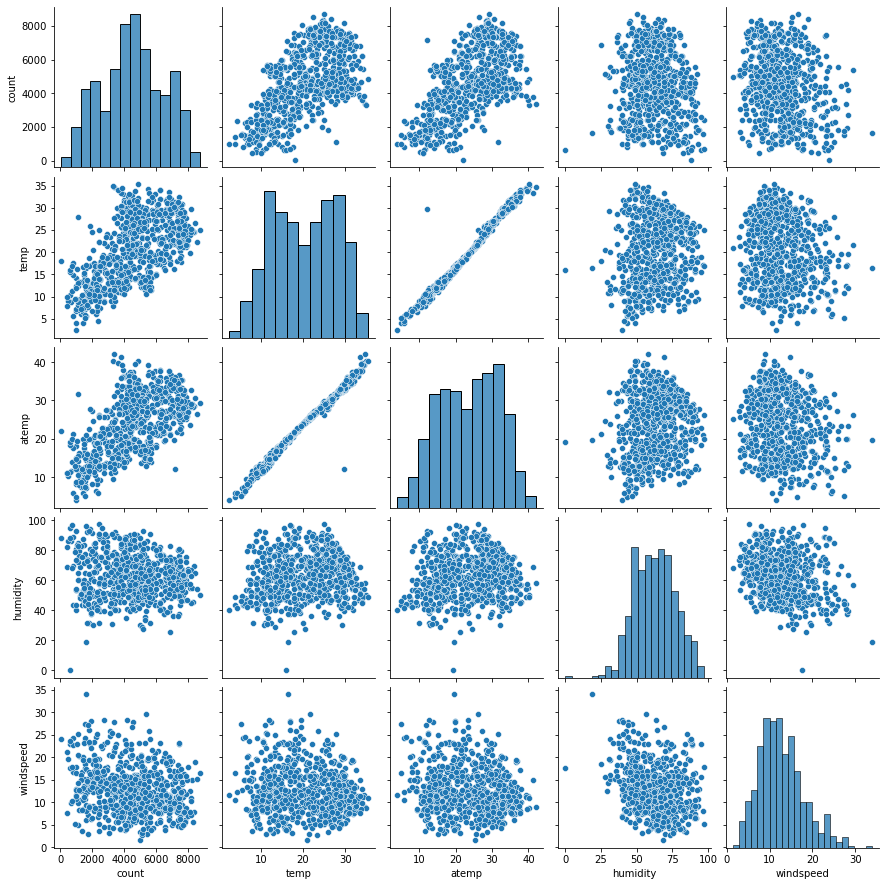

In [35]:
plt.figure(figsize = (20,30))
sns.pairplot(data=df_bike_share,vars=['count', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

In [36]:
# As seen in pairplot, temp and atemp are corelated with target variable 'count' 
# 'temp' and 'atemp(feeling temperture)' are highly corelated with eachother.


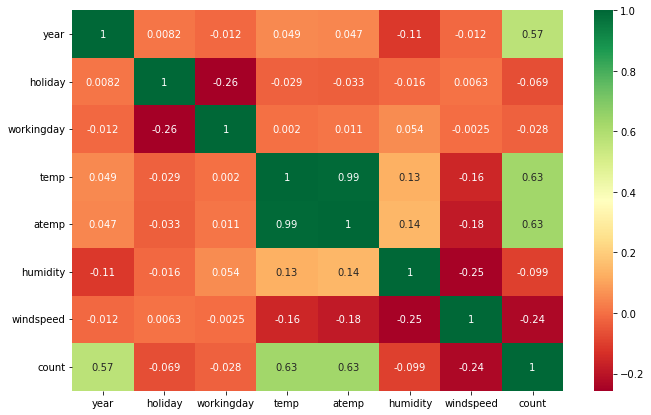

In [37]:
# this can also be seen by ploting heatmap
plt.figure(figsize=[11,7])
sns.heatmap(df_bike_share.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [38]:
#The correlation between temp and atemp is very high. And thus, we can drop atemp column.

In [39]:
df_bike_share.drop(columns='atemp',inplace=True)

#### Visualizing categorical variables with boxplots

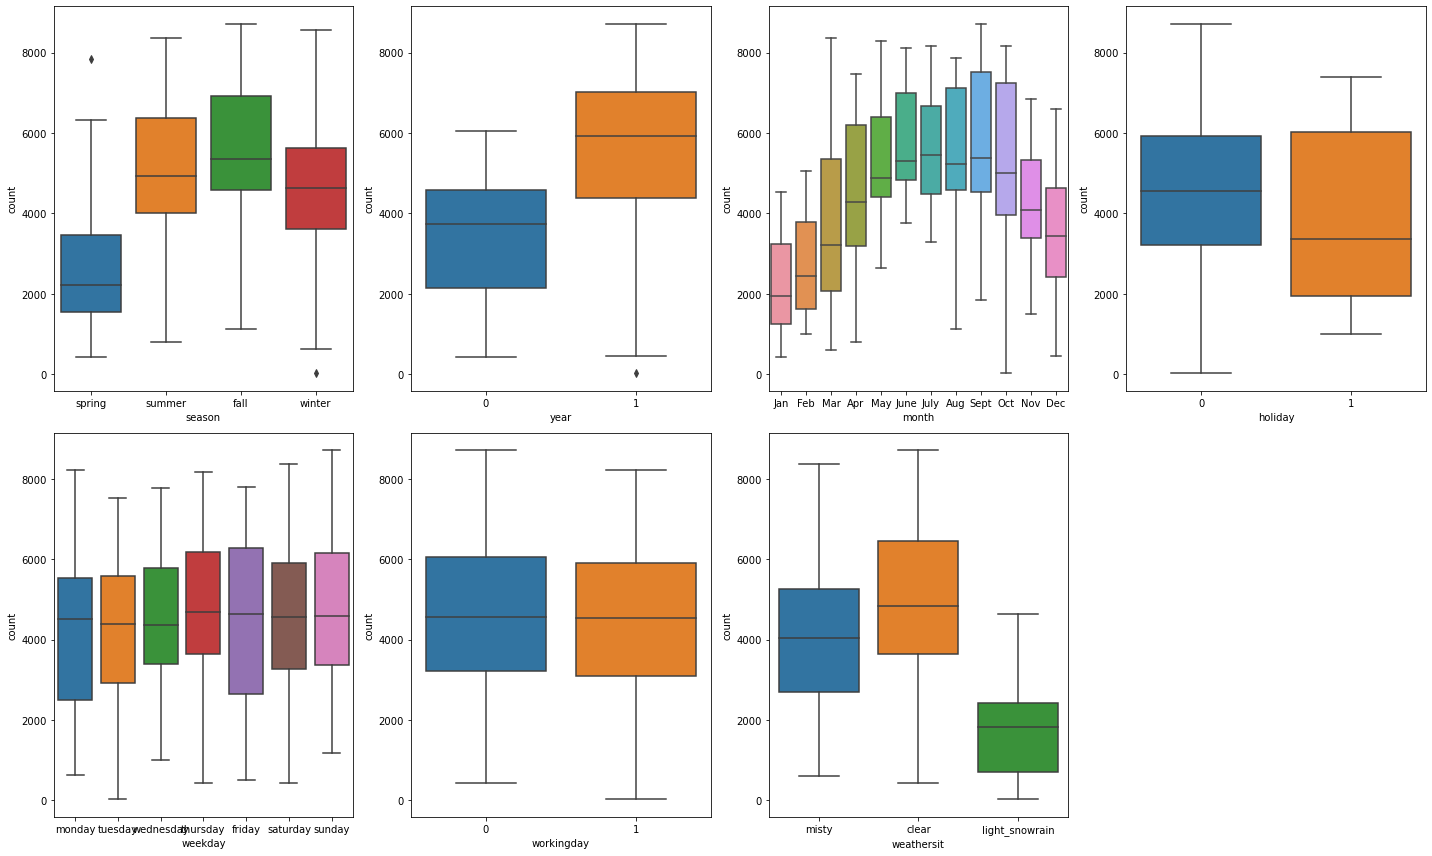

In [40]:
cat_vars=['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = df_bike_share)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = df_bike_share)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = df_bike_share)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = df_bike_share)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = df_bike_share)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = df_bike_share)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = df_bike_share)
plt.tight_layout()
plt.show()

**Insights from plots:**

1. Highest demand for rental bikes in Fall Season and lowest in Spring.
2. Demand increased in next year.
3. Demand are higher in June to October month.
4. Demand comparatively lower on month November to February may be because of weather condition (winter)
5. Demand is higher on Holdiday comparatively. 
6. comparatively demand is more on weekend Friday-Sunday. But not significantly showing high. 
7. Good weathersituation (clear)has highest demand.

In [41]:
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,monday,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,1600


In [42]:
df_bike_share.shape

(730, 11)

In [43]:
#After dropping the atemp column we now left with 11 variables

#### Univariate Analysis and Bivariate Analysis

#### 1. Count & Weathersituation

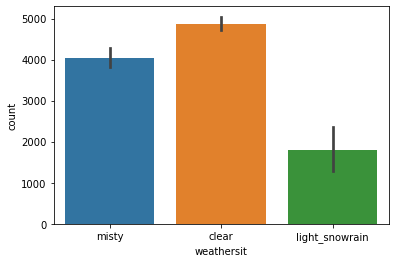

In [44]:
sns.barplot(x='weathersit',y='count',data=df_bike_share)
plt.show()

In [45]:
#bike demand is higher in clear weather situation and minimum in snowrain

#### 2.Count & Season

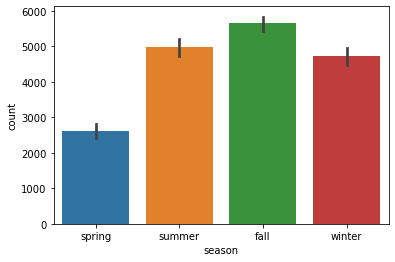

In [46]:
sns.barplot(x='season',y='count',data=df_bike_share)
plt.show()

In [47]:
#bike demand is max in fall season and min in spring season

#### 3.Count & month

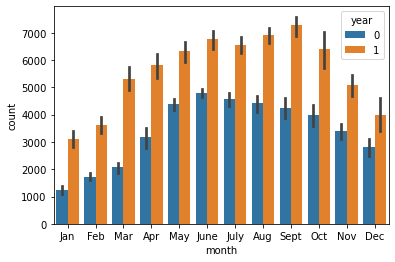

In [48]:
sns.barplot(x='month',y='count',hue='year' ,data=df_bike_share)
plt.show()

#### Overall bike demand is more in the year 2019.

Talking about month, we can say that demand in the month of June is highest.

#### 4.Count & month

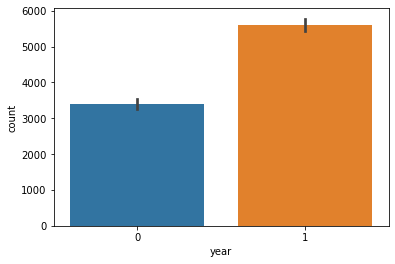

In [49]:
sns.barplot(x='year',y='count',data=df_bike_share)
plt.show()

#### bike demand is higher in 2019 than 2018

#### 5. Count & Temp

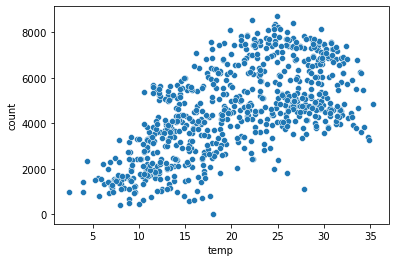

In [50]:

sns.scatterplot(x='temp',y='count',data=df_bike_share)
plt.show()

#### Bike demand is increasing as temp increases.

#### 6. Count & Humidity

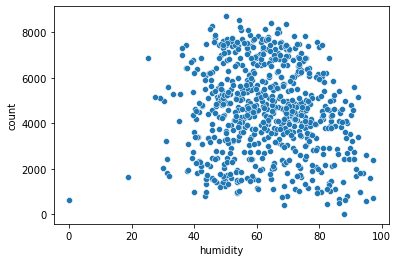

In [51]:
sns.scatterplot(x='humidity',y='count',data=df_bike_share)
plt.show()

#### There is no relation showing with the humidity. But as shown, bike demand is more in humidity range 40 to 80

In [52]:
df_bike_share.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,monday,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,1600


## 6. Data Preparation

#### Creating Dummy variables

In [53]:
df_bike_share.info()  #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [54]:
# Creating dummy variables for the Categorical variables: season,month,weekday,weathersit

# Before creating dummy variables, we  have to convert them into 'category' data types.

In [55]:
df_bike_share['season']=df_bike_share['season'].astype('category')
df_bike_share['weathersit']=df_bike_share['weathersit'].astype('category')
df_bike_share['month']=df_bike_share['month'].astype('category')
df_bike_share['weekday']=df_bike_share['weekday'].astype('category')

In [56]:
df_bike_share.info() #checking data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    int64   
 2   month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   humidity    730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  count       730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [57]:
df_bike_share = pd.get_dummies(data=df_bike_share,columns=['season','month','weekday'], drop_first=True)
df_bike_share = pd.get_dummies(data=df_bike_share,columns=['weathersit'])
df_bike_share

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_light_snowrain,weathersit_misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,1,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,10.386653,59.0000,10.416557,3095,1,0,0,...,0,0,1,0,0,0,0,0,0,1
727,1,0,0,10.386653,75.2917,8.333661,1341,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [58]:
#Dropped the first columns as (n-1) dummies can explain the n categories.

#Weathersit first column was not dropped as not to lose the info about severe weather situation.

In [59]:
df_bike_share.shape #Checking the shape of data after adding the dummy variables

(730, 30)

In [60]:
df_bike_share.columns #Checking the name of columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'count', 'season_spring', 'season_summer', 'season_winter', 'month_Aug',
       'month_Dec', 'month_Feb', 'month_Jan', 'month_July', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sept',
       'weekday_monday', 'weekday_saturday', 'weekday_sunday',
       'weekday_thursday', 'weekday_tuesday', 'weekday_wednesday',
       'weathersit_clear', 'weathersit_light_snowrain', 'weathersit_misty'],
      dtype='object')

In [61]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   humidity                   730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   count                      730 non-null    int64  
 7   season_spring              730 non-null    uint8  
 8   season_summer              730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  month_Aug                  730 non-null    uint8  
 11  month_Dec                  730 non-null    uint8  
 12  month_Feb                  730 non-null    uint8  
 13  month_Jan                  730 non-null    uint8  

## 7. Model Building

### 7.1 Splitting the Data into Train - Test Sets

In [62]:
from sklearn.model_selection import train_test_split

df_bike_share_train,df_bike_share_test = train_test_split(df_bike_share, train_size=0.7, random_state=100)

In [63]:
df_bike_share_train.shape

(510, 30)

In [64]:
df_bike_share_test.shape

(220, 30)

### 7.2 Scaling
Fit_transform the train data and transform the test data

Scaling of all the numerical variables and NOT the dummy variables

In [65]:
df_bike_share_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_light_snowrain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# Apply scaler() to all the columns except 'dummy' variables

In [67]:
numeric_var = list(df_bike_share.select_dtypes(include=['float64','int64']).columns)
numeric_var

['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count']

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_bike_share_train[numeric_var]=scaler.fit_transform(df_bike_share_train[numeric_var])

In [69]:
df_bike_share_train.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,season_spring,season_summer,season_winter,...,month_Sept,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_light_snowrain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation coefficients

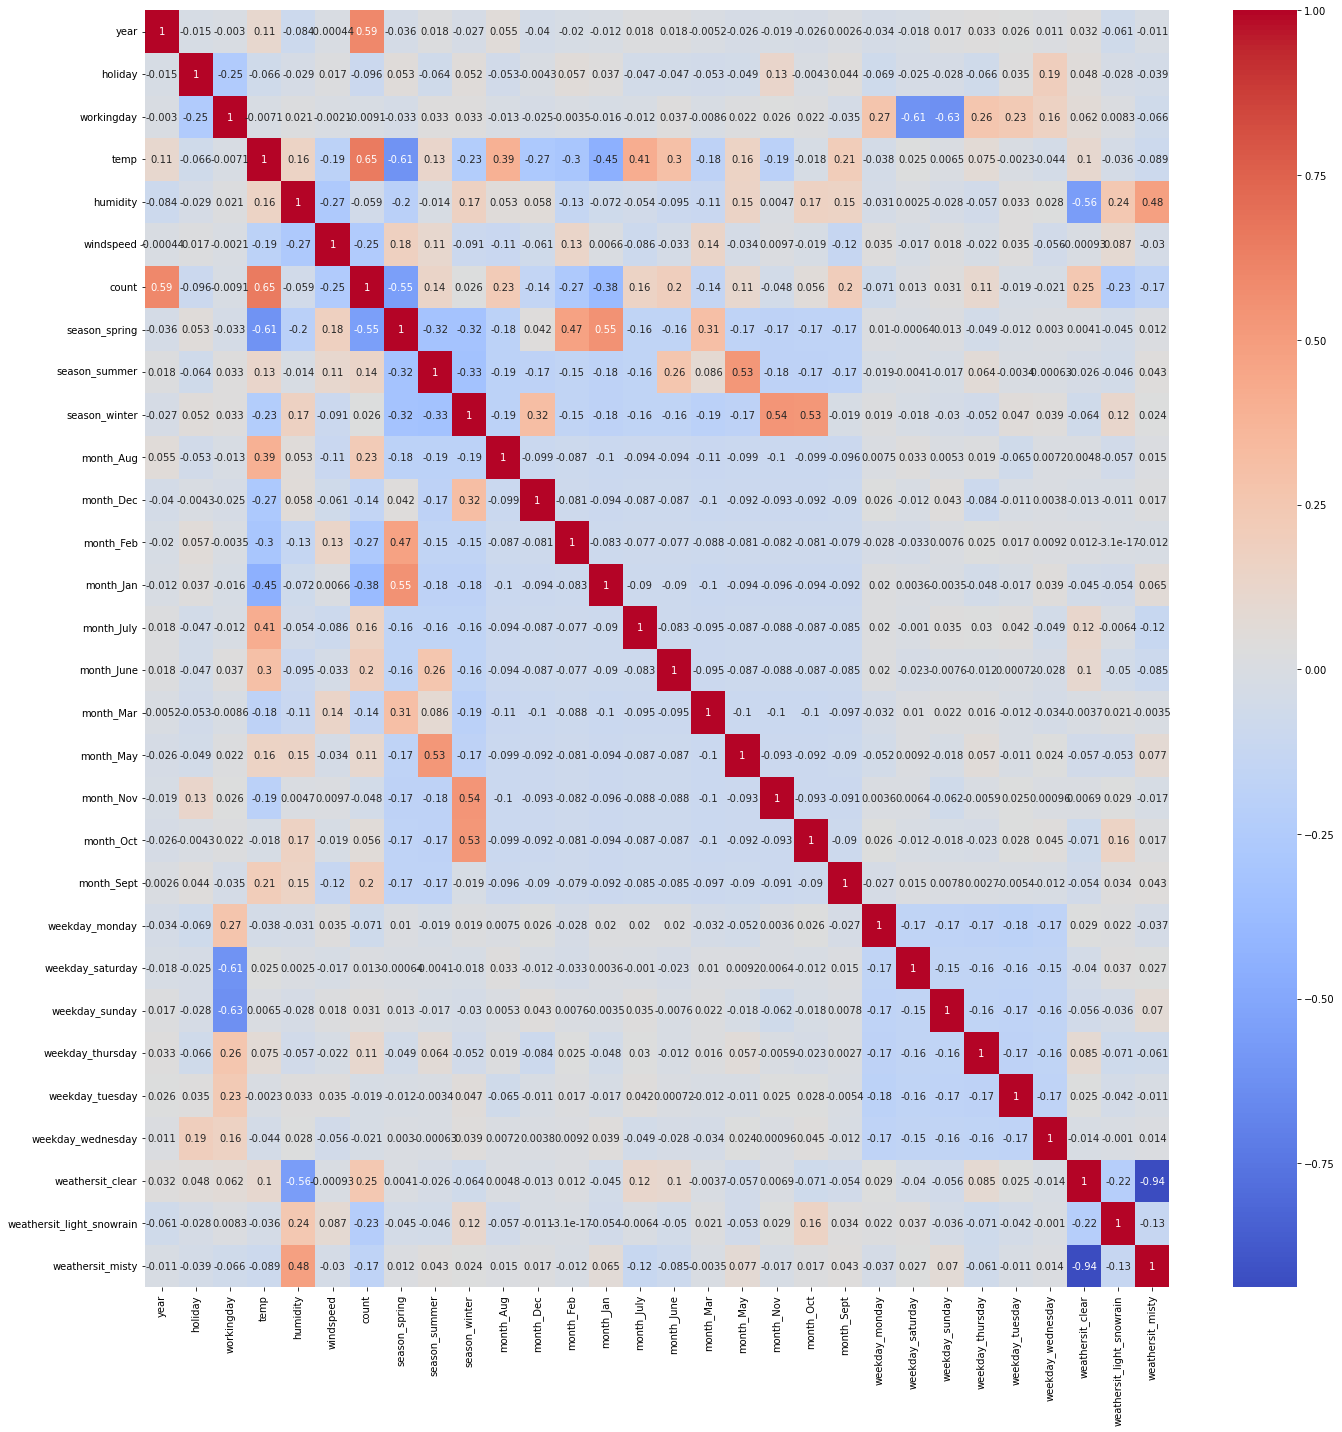

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(df_bike_share_train.corr(),annot=True,cmap='coolwarm')
plt.tight_layout()
plt.show()

#### Insights :
- count having correlation with year variable and temp. 
- Weather situation Misty and humidity showing correlation
- Spring season's with Jan and Feb month
- Summer Season with may month 
- Winter season with oct and nov month 
- weather situation misty and weather situation clear have -ve correltaion

### Spliting data into X and y

In [71]:
X_train = df_bike_share_train
y_train = df_bike_share_train.pop('count')

## 8.0 Modeling

RFE: As we have a lot of independent variables, so will first start with RFE method and in this automatic method- select top 'n' significant variables, and then will proceed with Manual Method to drop the variables.

Manual Method to optimise further on basis of p and VIF:

p-value: To check Significance of individual variable.

VIF: To check Multi-collinearity.(correlation b/w two independent variables)

### 8.1 Recursive Feature Elimination Method (RFE)

In [72]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [73]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [74]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_Jan', 'month_July',
       'month_Nov', 'month_Sept', 'weathersit_clear',
       'weathersit_light_snowrain', 'weathersit_misty'],
      dtype='object')

In [75]:
rfe.support_

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True])

In [76]:
#List of variables selected in top 15 list and pririoity ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 2),
 ('month_Feb', False, 3),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 11),
 ('month_Mar', False, 15),
 ('month_May', False, 7),
 ('month_Nov', True, 1),
 ('month_Oct', False, 13),
 ('month_Sept', True, 1),
 ('weekday_monday', False, 10),
 ('weekday_saturday', False, 5),
 ('weekday_sunday', False, 6),
 ('weekday_thursday', False, 8),
 ('weekday_tuesday', False, 14),
 ('weekday_wednesday', False, 12),
 ('weathersit_clear', True, 1),
 ('weathersit_light_snowrain', True, 1),
 ('weathersit_misty', True, 1)]

In [77]:
# Showing Dataframe with RFE selected variables-
X_train_rfe = X_train[col]
X_train_rfe.head()

,year,holiday,temp,humidity,windspeed,season_spring,season_summer,season_winter,month_Jan,month_July,month_Nov,month_Sept,weathersit_clear,weathersit_light_snowrain,weathersit_misty
576,1.0,0.0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,1,0,0
426,1.0,0.0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1.0,0.0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0,0
482,1.0,0.0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0.0,0.0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1


### 8.2 Modeling Building by dropping variable on basis of p-vale and VIF value.

#### Startgy to drop the variable:
#### High p(p>0.05) and High VIF(VIF>5) we will drop first

#### low p and low VIF we will keep

#### High p and low VIF or Low p and high VIF first we will go for high p only then VIF will automatically come down.

In [78]:
import statsmodels 
import statsmodels.api as sm

# Adding a constant

X_train_rfe = sm.add_constant(X_train_rfe)

### Model-1

In [79]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()

In [80]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.41e-189
Time:                        15:17:31   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
12,weathersit_clear,49.00
14,weathersit_misty,32.49
5,season_spring,5.20
13,weathersit_light_snowrain,4.16
2,temp,3.97
7,season_winter,3.76
6,season_summer,2.68
3,humidity,1.90
8,month_Jan,1.57
9,month_July,1.49


In [83]:
#We will first drop the variable which have high p values.
#Month november and month january have high p value but low VIF we will drop them one by one.

#### Dropping the month November as it have high p value

In [84]:
# Dropping the month_jan as it is having high p-value

X_train_rfe.drop(columns='month_Nov',inplace=True)

### Model-2

In [85]:
### Re-building the model after dropping the month_nov

In [86]:
# Rebuilding the model

X_train_rfe=sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          7.59e-190
Time:                        15:17:35   Log-Likelihood:                 511.13
No. Observations:                 510   AIC:                            -994.3
Df Residuals:                     496   BIC:                            -935.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [87]:
# Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
11,weathersit_clear,48.01
13,weathersit_misty,31.97
5,season_spring,5.08
12,weathersit_light_snowrain,4.13
2,temp,3.89
7,season_winter,3.59
6,season_summer,2.65
3,humidity,1.90
8,month_Jan,1.57
9,month_July,1.49


In [88]:
#After checking we find that VIF reduced slightly but month jan has high p value so need to drop that first

In [89]:
X_train_rfe.drop(columns='month_Jan',inplace=True)

### Model-3

In [90]:
# Rebuilding the model

X_train_rfe=sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.95e-190
Time:                        15:17:37   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [91]:
#Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
10,weathersit_clear,46.52
12,weathersit_misty,31.14
5,season_spring,5.02
11,weathersit_light_snowrain,4.08
2,temp,3.61
7,season_winter,3.48
6,season_summer,2.62
3,humidity,1.89
8,month_July,1.48
9,month_Sept,1.30


### After dropping the high p values VIF has been reduced but three variables still have high VIF we will drop them one by one and keep checking for p value and VIF

#### Drop the weathersit_clear as it has high VIF 46.52

In [92]:
X_train_rfe.drop(columns='weathersit_clear',inplace=True)

### Model-4

In [93]:
# Rebuilding the model

X_train_rfe=sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.95e-190
Time:                        15:17:39   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [94]:
# Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,humidity,28.03
2,temp,16.03
4,windspeed,4.65
5,season_spring,4.01
7,season_winter,3.33
6,season_summer,2.79
11,weathersit_misty,2.28
0,year,2.08
8,month_July,1.58
9,month_Sept,1.38


In [95]:
## No changes in p values but VIF of humidity and temp increased so drop the humidity first.

In [96]:
X_train_rfe.drop(columns='humidity',inplace=True)

### Model-5

In [97]:
# Rebuilding the model

X_train_rfe=sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.06e-187
Time:                        15:19:18   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [98]:
# Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,year,2.07
6,season_winter,1.78
7,month_July,1.58
10,weathersit_misty,1.55
8,month_Sept,1.34
9,weathersit_light_snowrain,1.08


In [99]:
# Dropping the month_juloy first as temp is a significant variable for prediction (for business it is important)so we won't drop it.

X_train_rfe.drop(columns='windspeed',inplace=True)

### Model-6

In [100]:
# Rebuilding the model

X_train_rfe=sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.71e-181
Time:                        15:19:20   Log-Likelihood:                 481.64
No. Observations:                 510   AIC:                            -941.3
Df Residuals:                     499   BIC:                            -894.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [101]:
# Checking for VIF values for multicollinearity
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
2,temp,4.22
0,year,2.06
4,season_summer,1.94
6,month_July,1.58
5,season_winter,1.57
9,weathersit_misty,1.55
3,season_spring,1.40
7,month_Sept,1.34
8,weathersit_light_snowrain,1.07
1,holiday,1.04


In [102]:
lm6.params

const                        0.150081
year                         0.232598
holiday                     -0.100259
temp                         0.502913
season_spring               -0.076589
season_summer                0.036651
season_winter                0.082879
month_July                  -0.052338
month_Sept                   0.081182
weathersit_light_snowrain   -0.298944
weathersit_misty            -0.078458
dtype: float64

#### From the above model lm6, we see that the p-values of all the 10 variables below 0.05 and VIF values are also less than 5 , which is acceptable.

#### F-Statistics

F-Statistics and Prob (F-statistic) used for testing the overall significance of the Model.

Here **F-statistic:233.3 and Prob(F-statistic):5.71e-181 which is almost equal to zero.

High F-statistic or low Prob(F-statistic) indicates the model is significant.

### R-Squared
R-squared =  0.824 which means that 82.4 % of the variance for the target variable 'count' is explained by the predictor variables , and hence we say that it is a good model.

Also, the values of R-squared and adjusted R-squared (0.820) is very close to each other, indicating a good model.

In [103]:
lm6.params #Checking parameters and their coefficient values of final model

const                        0.150081
year                         0.232598
holiday                     -0.100259
temp                         0.502913
season_spring               -0.076589
season_summer                0.036651
season_winter                0.082879
month_July                  -0.052338
month_Sept                   0.081182
weathersit_light_snowrain   -0.298944
weathersit_misty            -0.078458
dtype: float64

#### The equation of best fitted surface based on model lm6
count= 0.1500 + year(0.2325) - holiday (0.10025) + temp (0.5029) - season_spring(0.07658)+season_summer(0.036651) + season_winter(0.0828)- month_July(0.052338)+ month_Sept(0.081182)-weathersit_light_snowrain(0.298944)-weathersit_Misty(0.078458)

##   9.0 Model Evaluation

#### 9.1 Residual analysis normality of error terms.

In [104]:
y_train_pred=lm6.predict(X_train_rfe)

In [105]:
res=y_train-y_train_pred

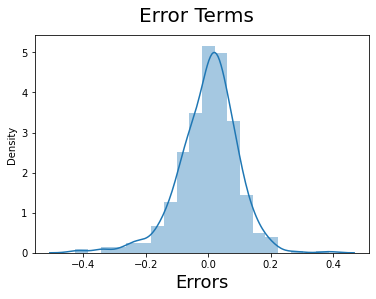

In [106]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)      
plt.show()

####  9.2 Multi Colinearity

In [107]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns[1:]
vif['VIF']=[variance_inflation_factor(X_train_rfe.drop(columns='const').values, i) for i in range(len(X_train_rfe.columns[1:]))]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,4.22
0,year,2.06
4,season_summer,1.94
6,month_July,1.58
5,season_winter,1.57
9,weathersit_misty,1.55
3,season_spring,1.40
7,month_Sept,1.34
8,weathersit_light_snowrain,1.07
1,holiday,1.04


In [108]:
## All VIF of variables < 5 so no case of multicoliniarity.

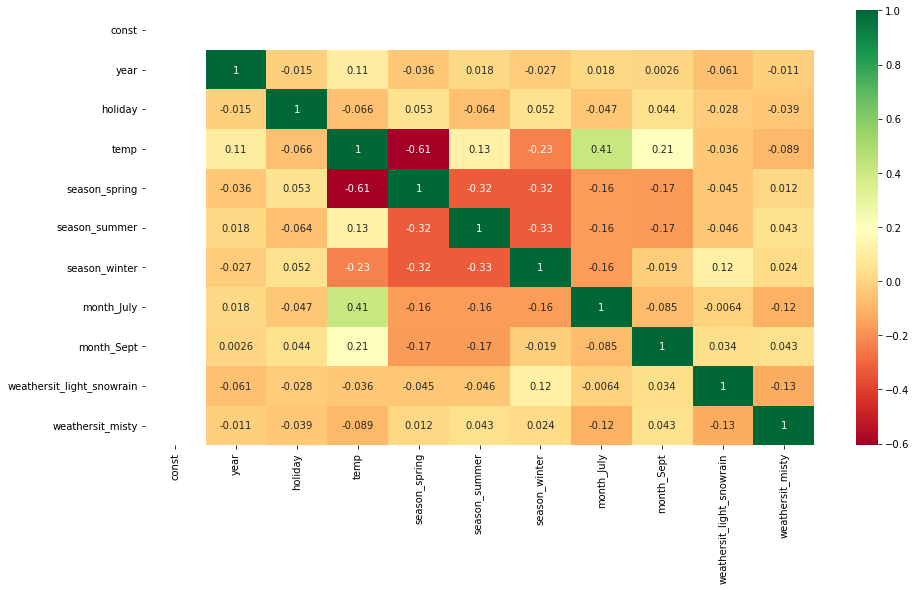

In [109]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()

### 9.3 Linearity

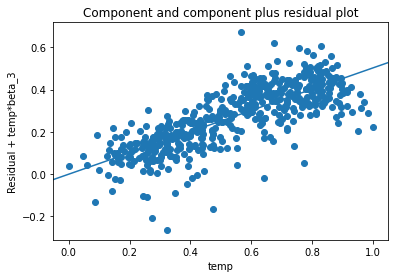

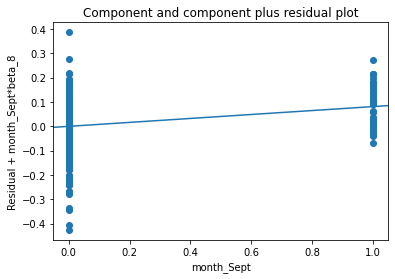

In [110]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm6, 'month_Sept')
plt.show()

#### 9.4 Homoscedasticity

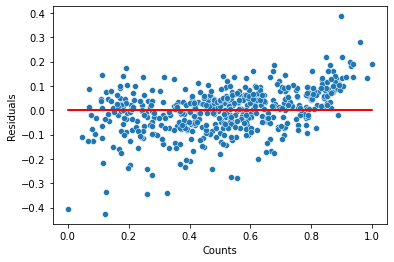

In [111]:
y_train_pred=lm6.predict(X_train_rfe)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Counts')
plt.ylabel('Residuals')
plt.show()

##### No visible pattern observed for residuals variance is constatnt.

## 10.Model Evalution on Test Set

Pre-Process the Test Data:-

Scale the test data: transform
Reatin only those columns in the test data which were used in the final model, lm6

In [112]:
# Scaling the test data and transform 

df_bike_share_test[numeric_var] = scaler.transform(df_bike_share_test[numeric_var])

In [113]:
y_test = df_bike_share_test.pop('count')
X_test = df_bike_share_test

In [114]:
# Reatin only those columns in the test data which were used in the final model, lm6

retain_col = list(X_train_rfe.columns[1:])
retain_col

['year',
 'holiday',
 'temp',
 'season_spring',
 'season_summer',
 'season_winter',
 'month_July',
 'month_Sept',
 'weathersit_light_snowrain',
 'weathersit_misty']

In [115]:
X_test_rfe = X_test[retain_col]

In [116]:
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.columns

Index(['const', 'year', 'holiday', 'temp', 'season_spring', 'season_summer',
       'season_winter', 'month_July', 'month_Sept',
       'weathersit_light_snowrain', 'weathersit_misty'],
      dtype='object')

In [117]:
# Let's predict on the test data using the final model lm6

y_predct = lm6.predict(X_test_rfe)

### Plotting Actual Vs. Predicted

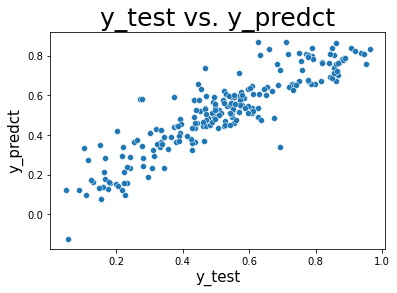

In [118]:
sns.scatterplot(y_test, y_predct)
plt.title("y_test vs. y_predct",fontsize=25)             
plt.xlabel('y_test',fontsize=15)                         
plt.ylabel('y_predct',fontsize=15)                      
plt.show()

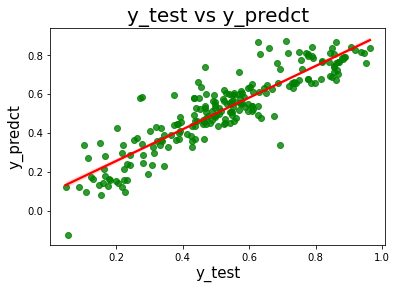

In [119]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_predct, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_predct', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_predct', fontsize=15)
plt.show()

In [120]:
# Importing the library for r_squared on test data set

from sklearn.metrics import r2_score

In [121]:
r_squared=r2_score(y_test, y_predct)
round(r_squared,3)

0.809

In [122]:
n = X_test_rfe.shape[0]  # n is number of rows in X_test_rfe
p = X_test_rfe.shape[1]  # p is Number of features/predictors which is number of columns in X_test_rfe
adj_r_squared = 1-(1-r_squared)*(n-1)/(n-p-1)
round(adj_r_squared,3)

0.799

In [123]:
#Returns the mean squared error; we'll take a square root
from sklearn.metrics import mean_squared_error
round(np.sqrt(mean_squared_error(y_test, y_predct)),3)

0.095

### Comparison b/w the results on Train and Test datasets:

R-squared Value:

Train set : 82.4% Test set : 80.9%

Adj R-squared Value:

Train set : 82.0 %% Test set : 79.9%

Difference between the R-squared value for the train and test dataset and Adjusted R-squared value for the train and test dataset not more than 5% ,So this is a good model.

Conclusion:
Final Equation for the best fitted line:
From the coefficients that we get for the variables, our linear regression equation becomes:
count= 0.1500 + year(0.2325) - holiday (0.10025) + temp (0.5029) - season_spring(0.07658)+season_summer(0.036651) + season_winter(0.0828)- month_jul(0.052338)+ month_sept(0.081182)-weathersit_light_snowrain(0.298944)-weathersit_Misty(0.078458)

The significant variables in predicting demand for shared bikes are:

temp

year

season (summer, spring, winter)

month (July,Sep)

weathersit (Misty & Snowy)

holiday

Dependency of variables:

The demand goes increasing on higher temperatures.

The demand increases in summer season and winter season and decreases in spring season.

The demand increases in sep and reduces in july.

The demand decreases if weather situation is either (Misty) or (light_Snowy).

The demand increased in the year (2019).